[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Decision Tree Accuracy : 0.5
              precision    recall  f1-score   support

    Accepted       0.50      1.00      0.67         1
    Rejected       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Logistic Regression Accuracy : 0.5
              precision    recall  f1-score   support

    Accepted       0.50      1.00      0.67         1
    Rejected       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Random Forest Accuracy : 0.5
              precision    recall  f1-score   support

    Accepted       0.50      1.00      0.67         1
    Rejected       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Saving indrakaran soma.docx to indrakaran soma (1).docx
Saving harish S.docx to harish S (1).docx
Saving employer_mounika details.docx to employer_mounika details (1).docx
Saving chenna kesava.docx to chenna kesava.docx
Saving avinash G.docx to avinash G.docx
Resume 'indrakaran soma (1).docx' - Decision Tree Prediction  (Accepted/Rejected)      : Accepted
Resume 'indrakaran soma (1).docx' - Logistic Regression Prediction  (Accepted/Rejected): Accepted
Resume 'indrakaran soma (1).docx' - Random Forest Prediction  (Accepted/Rejected)      : Accepted

Recommended Jobs for 'indrakaran soma (1).docx':
 - Data Scientist: Looking for a Data Scientist with experience in Python and machine learning.
 - Machine Learning Engineer: Machine Learning Engineer with experience in Python and data analysis.
 - Full Stack Developer: Full Stack Developer proficient in JavaScript and React.


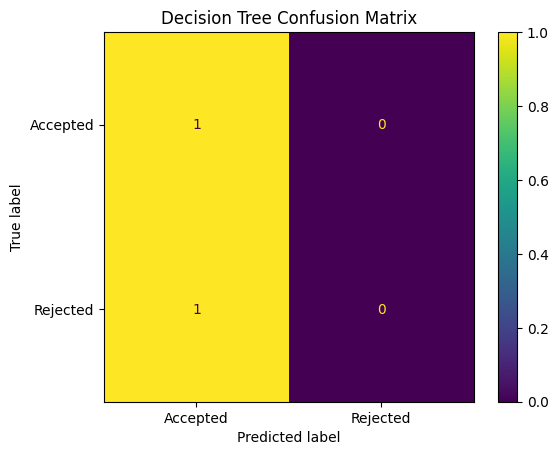

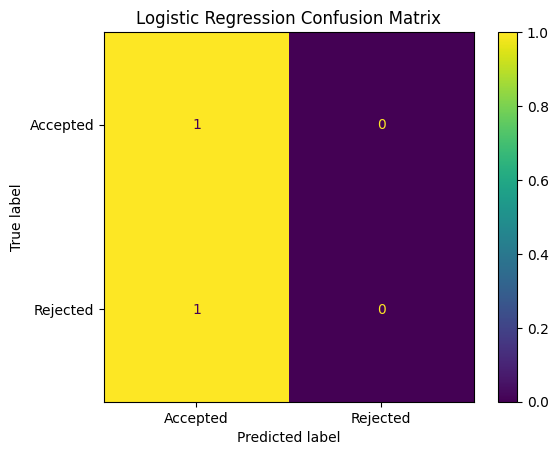

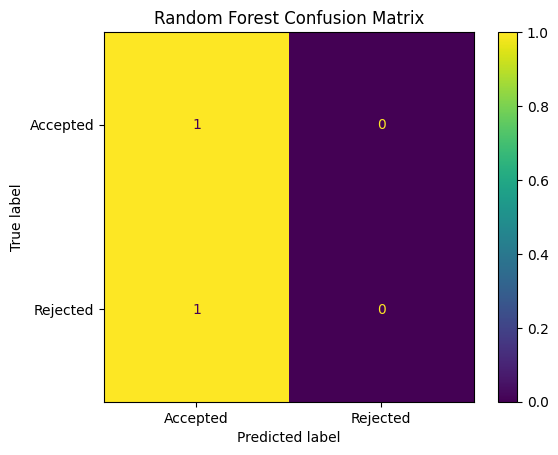

Resume 'harish S (1).docx' - Decision Tree Prediction  (Accepted/Rejected)      : Accepted
Resume 'harish S (1).docx' - Logistic Regression Prediction  (Accepted/Rejected): Accepted
Resume 'harish S (1).docx' - Random Forest Prediction  (Accepted/Rejected)      : Accepted

Recommended Jobs for 'harish S (1).docx':
 - Data Scientist: Looking for a Data Scientist with experience in Python and machine learning.
 - Machine Learning Engineer: Machine Learning Engineer with experience in Python and data analysis.
 - Cloud Engineer: Cloud Engineer skilled in AWS and Azure with a background in cloud technologies.


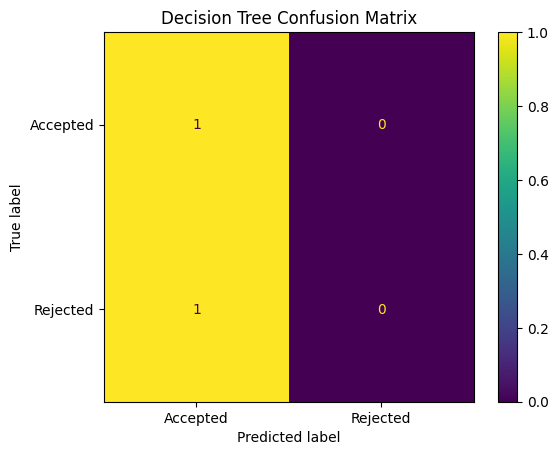

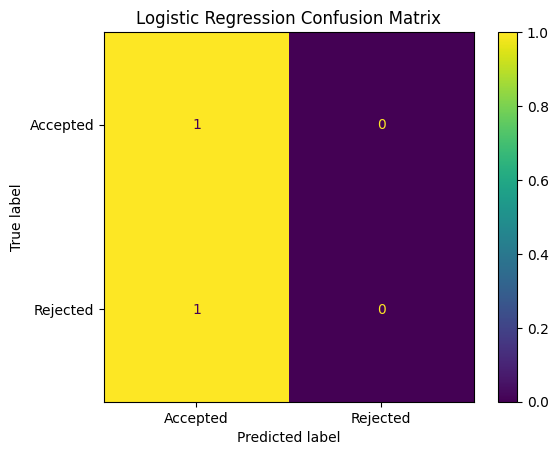

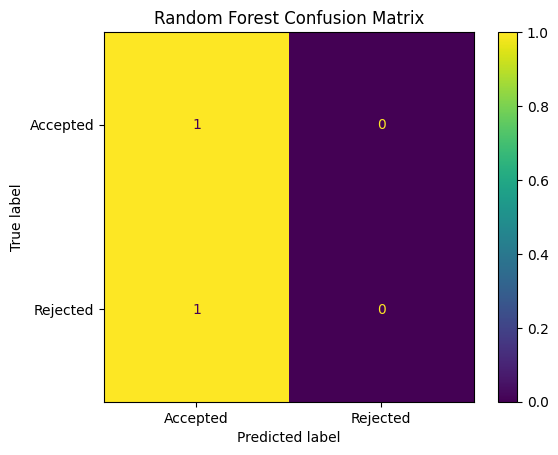

Resume 'chenna kesava.docx' - Decision Tree Prediction  (Accepted/Rejected)      : Accepted
Resume 'chenna kesava.docx' - Logistic Regression Prediction  (Accepted/Rejected): Accepted
Resume 'chenna kesava.docx' - Random Forest Prediction  (Accepted/Rejected)      : Accepted

Recommended Jobs for 'chenna kesava.docx':
 - Data Scientist: Looking for a Data Scientist with experience in Python and machine learning.
 - Machine Learning Engineer: Machine Learning Engineer with experience in Python and data analysis.
 - Full Stack Developer: Full Stack Developer proficient in JavaScript and React.


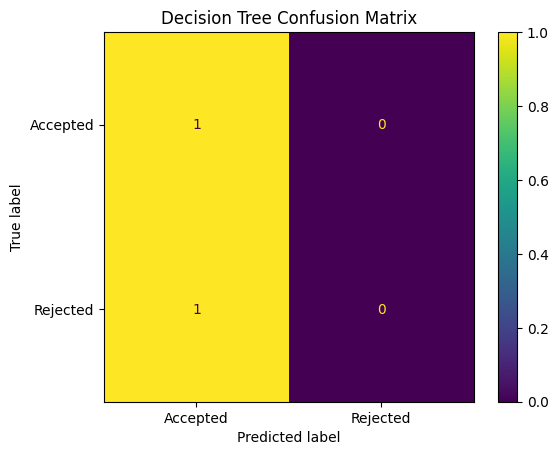

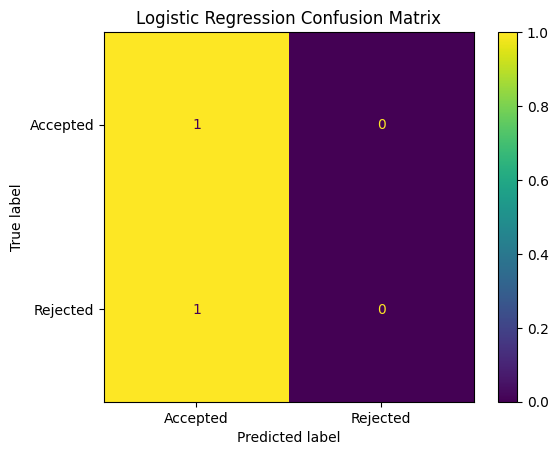

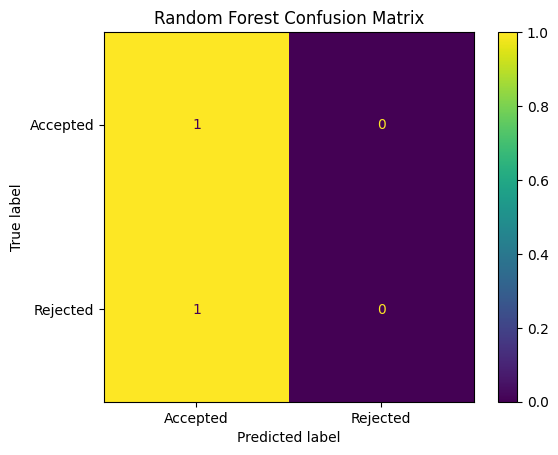

Resume 'avinash G.docx' - Decision Tree Prediction  (Accepted/Rejected)      : Accepted
Resume 'avinash G.docx' - Logistic Regression Prediction  (Accepted/Rejected): Accepted
Resume 'avinash G.docx' - Random Forest Prediction  (Accepted/Rejected)      : Accepted

Recommended Jobs for 'avinash G.docx':
 - Data Scientist: Looking for a Data Scientist with experience in Python and machine learning.
 - Machine Learning Engineer: Machine Learning Engineer with experience in Python and data analysis.
 - Full Stack Developer: Full Stack Developer proficient in JavaScript and React.


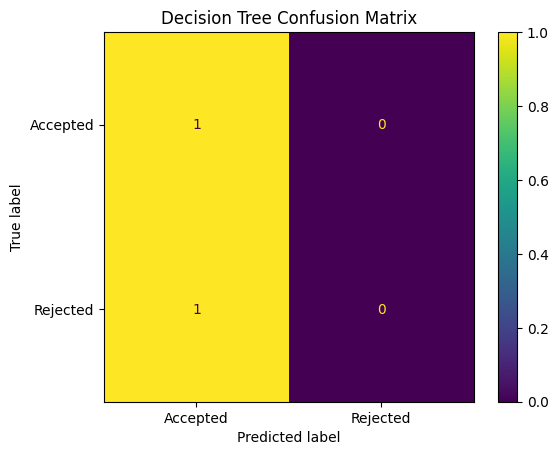

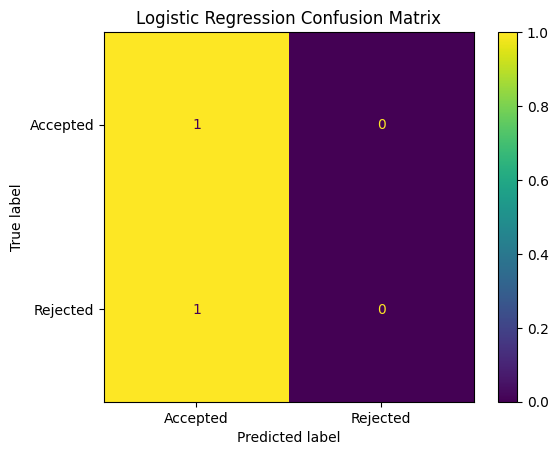

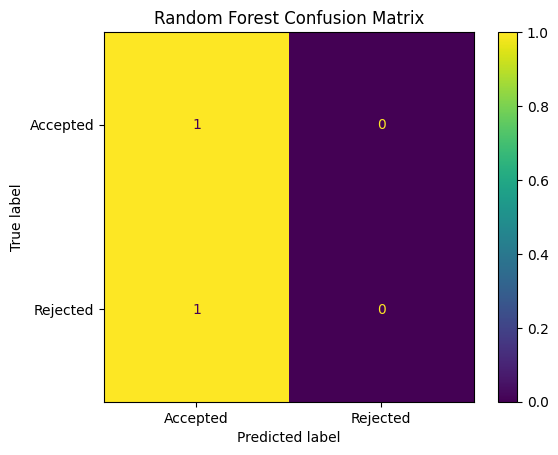

In [5]:
#pip install python-docx scikit-learn nltk matplotlib PyPDF2

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from docx import Document
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import files
import matplotlib.pyplot as plt
import re
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

# Function to extract text from docx file
def extract_text_from_docx(docx_path):
    try:
        doc = Document(docx_path)
        fullText = []
        for para in doc.paragraphs:
            fullText.append(para.text)
        return '\n'.join(fullText)
    except Exception as e:
        print(f"Error extracting text from {docx_path}: {e}")
        return ""

# Function to extract text from PDF file
def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            Text = []
            for page in reader.pages:
                Text.append(page.extract_text())
            return '\n'.join(Text)
    except Exception as e:
        print(f"Error extracting text from {pdf_path}: {e}")
        return ""

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

# Function to extract additional features
def extract_features(text):
    skills = ['python', 'java', 'aws', 'azure', 'sql', 'cloud', 'docker', 'kubernetes']
    word_tokens = word_tokenize(text.lower())
    features = {
        'text_length': len(word_tokens),
        'num_skills': sum([1 for skill in skills if skill in word_tokens])
    }
    return features

# Function to combine additional features with TF-IDF vectorizer
def combine_features(tfidf_vec, features_dict):
    additional_features = pd.DataFrame([features_dict])
    combined = pd.concat([pd.DataFrame(tfidf_vec.toarray()), additional_features], axis=1)
    combined.columns = combined.columns.astype(str)  # Ensure all column names are strings
    return combined

# Function to visualize the decision tree
def plot_decision_tree(clf, featureNames, resume_file):
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=featureNames, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)
    plt.title(f'Decision Tree Visualization for {resume_file}')
    plt.show()

# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(title)
    plt.show()

# Function to recommend jobs based on resume text
def recommend_jobs(resume_text, vectorizer, job_vecs, job_df, top_n=3):
    preprocessed_text = preprocess_text(resume_text)
    resume_vec = vectorizer.transform([preprocessed_text])
    similarity_scores = cosine_similarity(resume_vec, job_vecs).flatten()
    top_n_indices = similarity_scores.argsort()[-top_n:][::-1]
    recommendations = job_df.iloc[top_n_indices]
    return recommendations

job_data = {
    'job_title': [
        'Data Scientist',
        'Software Engineer',
        'Cloud Engineer',
        'Full Stack Developer',
        'DevOps Engineer',
        'Machine Learning Engineer'
    ],
    'job_description': [
        'Looking for a Data Scientist with experience in Python and machine learning.',
        'Software Engineer with knowledge in Java and web development.',
        'Cloud Engineer skilled in AWS and Azure with a background in cloud technologies.',
        'Full Stack Developer proficient in JavaScript and React.',
        'DevOps Engineer familiar with Docker and Kubernetes.',
        'Machine Learning Engineer with experience in Python and data analysis.'
    ]
}

def main():

    data = {
        'resume_text': [
            'Experienced Python developer with machine learning skills.',
            'Java developer with a background in web applications.',
            'Cloud architect with expertise in AWS and Azure.',
            'Full stack developer with skills in React and Node.js.',
            'DevOps engineer experienced with Docker and Kubernetes.',
            'Data analyst with a strong understanding of statistics.'
        ],
        'category': [
            'Accepted',
            'Rejected',
            'Accepted',
            'Accepted',
            'Rejected',
            'Accepted'
        ]
    }

    df = pd.DataFrame(data)

    job_df = pd.DataFrame(job_data)

    # Split data into training and testing sets
    X = df['resume_text']
    y = df['category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Extract additional features and combine with TF-IDF vectors
    X_train_combined = [combine_features(vec, extract_features(text)) for vec, text in zip(X_train_vec, X_train)]
    X_test_combined = [combine_features(vec, extract_features(text)) for vec, text in zip(X_test_vec, X_test)]

    # Train Decision Tree Classifier
    dt_clf = DecisionTreeClassifier()
    X_combined_df = pd.concat(X_train_combined, axis=0).reset_index(drop=True)
    dt_clf.fit(X_combined_df, y_train)

    # Train Logistic Regression Classifier
    lr_clf = LogisticRegression()
    lr_clf.fit(X_combined_df, y_train)

    # Train Random Forest Classifier
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_combined_df, y_train)

    # Predict and evaluate Decision Tree
    y_pred_dt = dt_clf.predict(pd.concat(X_test_combined, axis=0).reset_index(drop=True))
    print(f"Decision Tree Accuracy : {accuracy_score(y_test, y_pred_dt)}")
    print(classification_report(y_test, y_pred_dt))

    # Predict and evaluate Logistic Regression
    y_pred_lr = lr_clf.predict(pd.concat(X_test_combined, axis=0).reset_index(drop=True))
    print(f"Logistic Regression Accuracy : {accuracy_score(y_test, y_pred_lr)}")
    print(classification_report(y_test, y_pred_lr))

    # Predict and evaluate Random Forest
    y_pred_rf = rf_clf.predict(pd.concat(X_test_combined, axis=0).reset_index(drop=True))
    print(f"Random Forest Accuracy : {accuracy_score(y_test, y_pred_rf)}")
    print(classification_report(y_test, y_pred_rf))

    uploaded = files.upload()
    results = []

    job_vecs = vectorizer.transform(job_df['job_description'])

    for resume_file in uploaded.keys():
        if resume_file.endswith('.docx'):
            resume_text = extract_text_from_docx(resume_file)
        elif resume_file.endswith('.pdf'):
            resume_text = extract_text_from_pdf(pdf_file)
        else:
            print(f"Unsupported file format for {resume_file}")
            continue

        if resume_text:
            preprocessed_text = preprocess_text(resume_text)
            resume_vec = vectorizer.transform([preprocessed_text])
            additional_features = extract_features(preprocessed_text)
            resume_combined = combine_features(resume_vec, additional_features)

            prediction_dt = dt_clf.predict(resume_combined)
            prediction_lr = lr_clf.predict(resume_combined)
            prediction_rf = rf_clf.predict(resume_combined)

            print(f"Resume '{resume_file}' - Decision Tree Prediction  (Accepted/Rejected)      : {prediction_dt[0]}")
            print(f"Resume '{resume_file}' - Logistic Regression Prediction  (Accepted/Rejected): {prediction_lr[0]}")
            print(f"Resume '{resume_file}' - Random Forest Prediction  (Accepted/Rejected)      : {prediction_rf[0]}")

            results.append({
                'resume_file': resume_file,
                'prediction_dt': prediction_dt[0],
                'prediction_lr': prediction_lr[0],
                'prediction_rf': prediction_rf[0]
            })

            recommended_jobs = recommend_jobs(resume_text, vectorizer, job_vecs, job_df)
            print(f"\nRecommended Jobs for '{resume_file}':")
            for _, row in recommended_jobs.iterrows():
                print(f" - {row['job_title']}: {row['job_description']}")

            plot_confusion_matrix(y_test, y_pred_dt, title='Decision Tree Confusion Matrix')
            plot_confusion_matrix(y_test, y_pred_lr, title='Logistic Regression Confusion Matrix')
            plot_confusion_matrix(y_test, y_pred_rf, title='Random Forest Confusion Matrix')

    return results

if __name__ == "__main__":
    main()